<a href="https://colab.research.google.com/github/zpetey28/IS4487_ZackPeterson/blob/main/Copy_of_lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset.  Your target variable is total sales revenue.  


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd





## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [ ]:
# Replace the path with the correct path to your CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Data_Analytics/Lab 6/superstore_retail_orders.csv'
df = pd.read_csv(file_path)

df.describe()


# Include description for all columns including non-numeric
print(df.describe(include='all'))

# Check for any null values in the DataFrame
print(df.isnull().sum())

# Check the shape of the DataFrame to confirm the record count
print(f"Shape of the DataFrame: {df.shape}")


        customer_id       customer_name  address_line_1        city  \
count   9569.000000                9569            9448        9516   
unique          NaN                 764             744         261   
top             NaN  Eadmund Lancashire  739 Rusk Trail  Washington   
freq            NaN                  36              36         393   
mean     282.910962                 NaN             NaN         NaN   
std      199.763947                 NaN             NaN         NaN   
min        1.000000                 NaN             NaN         NaN   
25%      127.000000                 NaN             NaN         NaN   
50%      253.000000                 NaN             NaN         NaN   
75%      376.000000                 NaN             NaN         NaN   
max      800.000000                 NaN             NaN         NaN   

       state_province   postal_code     order_id  order_date  customer_id.1  \
count            9569   9416.000000  9569.000000        9312    9569

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Create a total_amount variable, based on the product price and quantity

In [ ]:
# Convert 'product_price' to numeric, removing the dollar sign and converting to float
df['product_price'] = df['product_price'].replace('[\$,]', '', regex=True).astype(float)

# For simplicity, assuming 'total_amount' in the dataset is supposed to be replaced by the calculation below
# If 'total_amount' is different from the product of 'product_price' and 'quantity', we'll calculate it anew
df['calculated_total_amount'] = df['product_price'] * df['quantity']

# Convert character variables to categorical (factors) where appropriate
categorical_columns = ['customer_name', 'address_line_1', 'city', 'state_province', 'product_name', 'order_year_month', 'order_month']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Checking for outliers by looking at the summary statistics for numerical columns
outlier_check = df.describe()

# Remove rows with empty (NULL) values
df_cleaned = df.dropna()

# Check for outliers in 'product_price' and 'quantity' as an example
# Here, we use a simple method of considering values beyond 3 standard deviations from the mean as outliers
for column in ['product_price', 'quantity']:
    mean = df_cleaned[column].mean()
    std = df_cleaned[column].std()
    outliers = df_cleaned[(df_cleaned[column] > mean + 3 * std) | (df_cleaned[column] < mean - 3 * std)]
    # Removing outliers from df_cleaned
    df_cleaned = df_cleaned[(df_cleaned[column] <= mean + 3 * std) & (df_cleaned[column] >= mean - 3 * std)]

# Display summary to check for changes and outliers removed
cleaned_summary = df_cleaned.describe()
outlier_check, cleaned_summary, df_cleaned.shape

(       customer_id   postal_code     order_id  customer_id.1   order_id.1  \
 count  9569.000000   9416.000000  9569.000000    9569.000000  9569.000000   
 mean    282.910962  52225.007116  5107.539450     282.910962  5107.539450   
 std     199.763947  29619.544418  2043.449403     199.763947  2043.449403   
 min       1.000000   1105.000000  1001.000000       1.000000  1001.000000   
 25%     127.000000  27409.000000  3393.000000     127.000000  3393.000000   
 50%     253.000000  48295.000000  5577.000000     253.000000  5577.000000   
 75%     376.000000  79923.000000  6829.000000     376.000000  6829.000000   
 max     800.000000  99812.000000  8147.000000     800.000000  8147.000000   
 
         product_id     quantity  product_id.1  product_price  \
 count  9569.000000  9513.000000   9569.000000    9569.000000   
 mean    106.736650     3.453380    106.736650     289.262745   
 std       3.694805     4.393894      3.694805     340.284077   
 min     101.000000     1.000000    

## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales Revenue
- Create a bar chart
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales. You can use any variables for these sample plots.

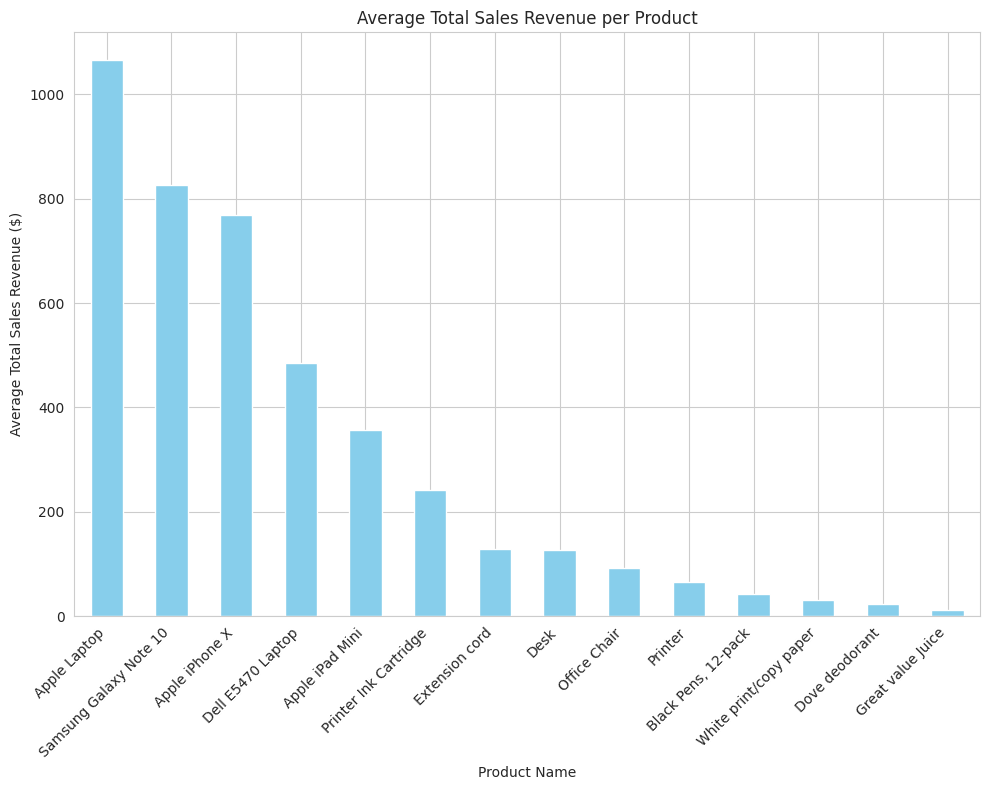

In [ ]:
#bar chart
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar chart showing the average total sales revenue per product name
plt.figure(figsize=(10, 8))
bar_chart_data = df_cleaned.groupby('product_name')['calculated_total_amount'].mean().sort_values(ascending=False)
bar_chart_data.plot(kind='bar', color='skyblue')
plt.title('Average Total Sales Revenue per Product')
plt.xlabel('Product Name')
plt.ylabel('Average Total Sales Revenue ($)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

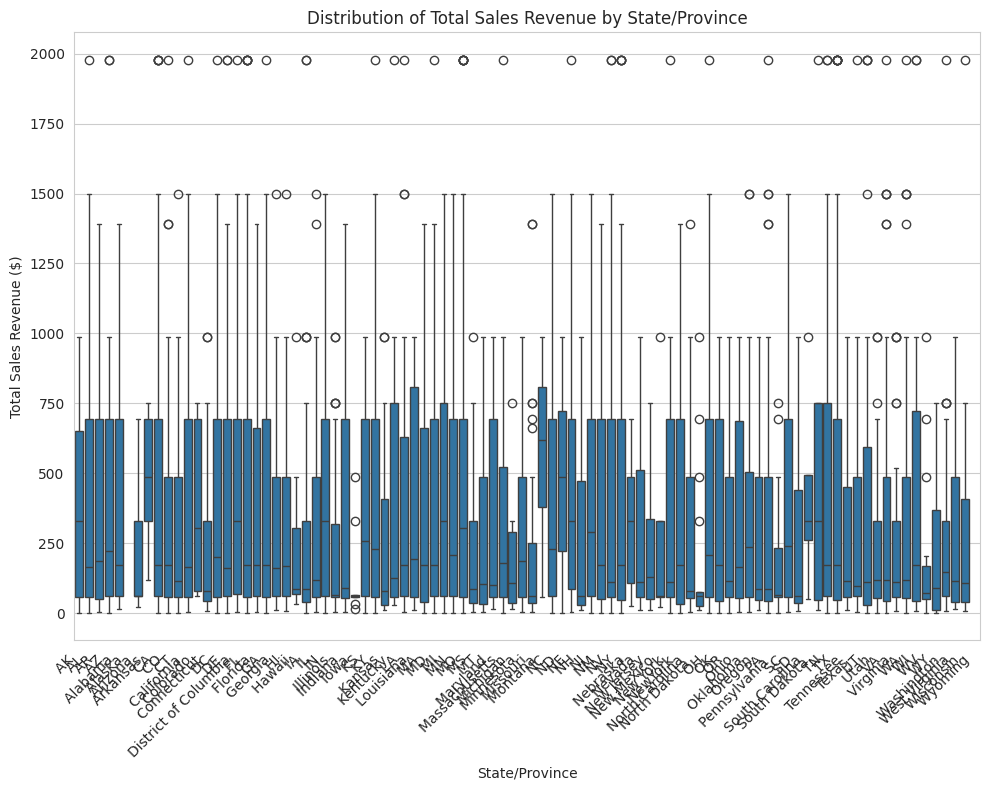

In [ ]:
#box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='state_province', y='calculated_total_amount', data=df_cleaned)
plt.title('Distribution of Total Sales Revenue by State/Province')
plt.xlabel('State/Province')
plt.ylabel('Total Sales Revenue ($)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

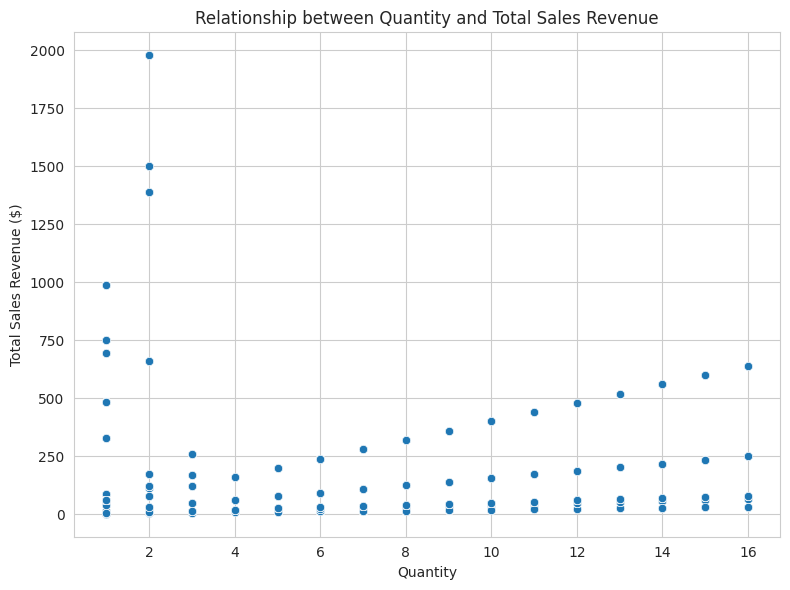

In [ ]:
#scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='quantity', y='calculated_total_amount', data=df_cleaned)
plt.title('Relationship between Quantity and Total Sales Revenue')
plt.xlabel('Quantity')
plt.ylabel('Total Sales Revenue ($)')
plt.tight_layout()
plt.show()

## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales  
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

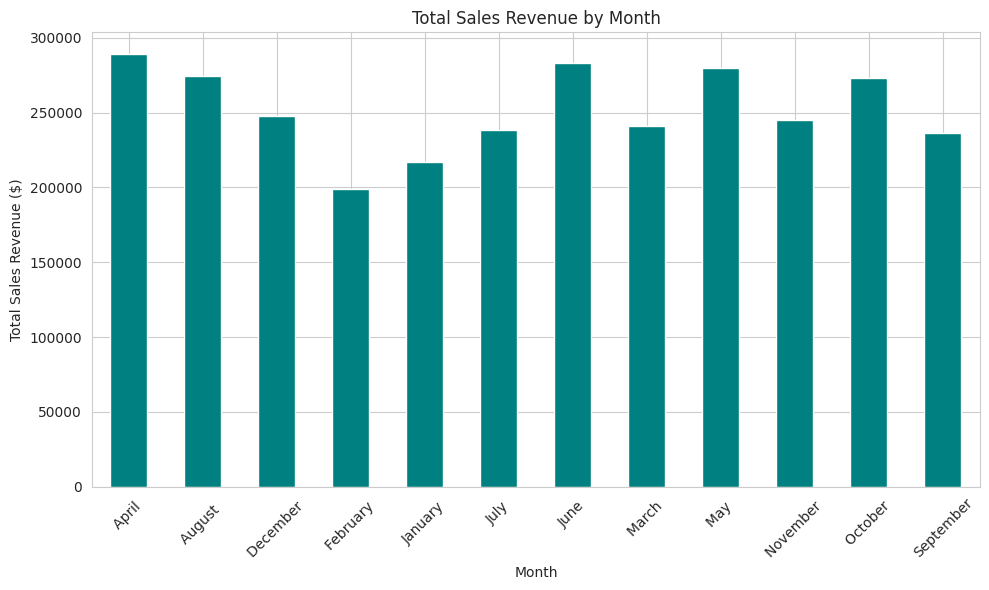

In [ ]:
#month of year
monthly_sales = df_cleaned.groupby('order_month')['calculated_total_amount'].sum().sort_index()

# Plot the monthly sales revenue
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='teal')
plt.title('Total Sales Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

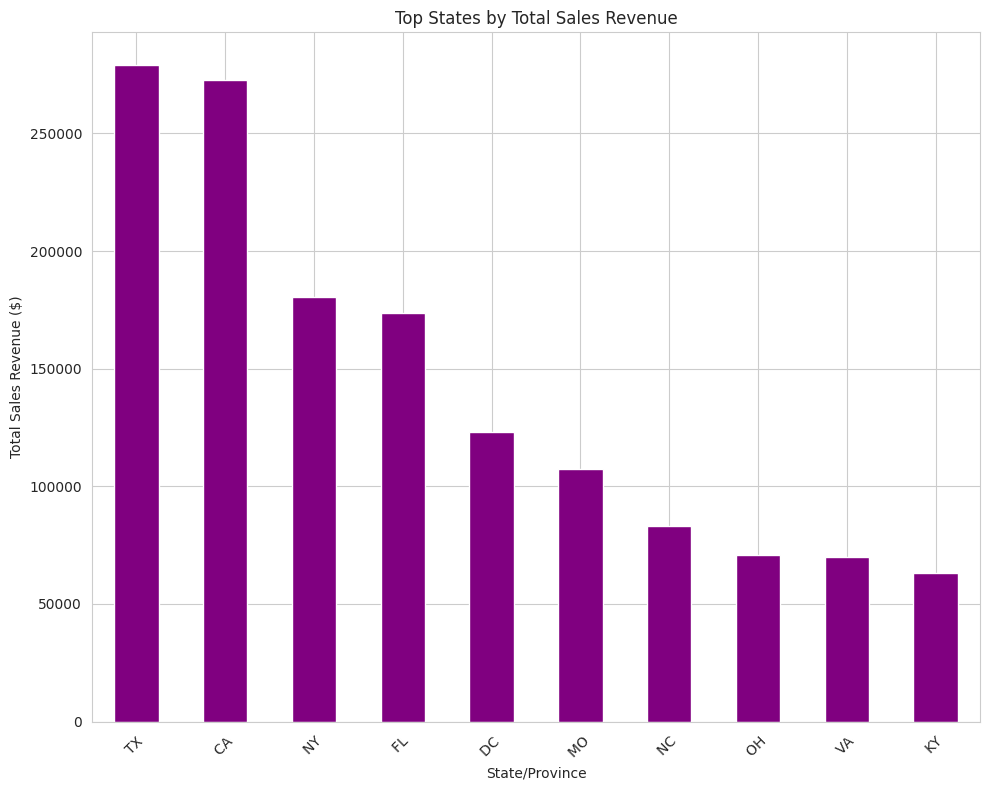

In [ ]:
#sales by state
state_sales = df_cleaned.groupby('state_province')['calculated_total_amount'].sum().sort_values(ascending=False)

# Plot the top states by sales revenue
plt.figure(figsize=(10, 8))
state_sales.head(10).plot(kind='bar', color='purple')  # Display top 10 states
plt.title('Top States by Total Sales Revenue')
plt.xlabel('State/Province')
plt.ylabel('Total Sales Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

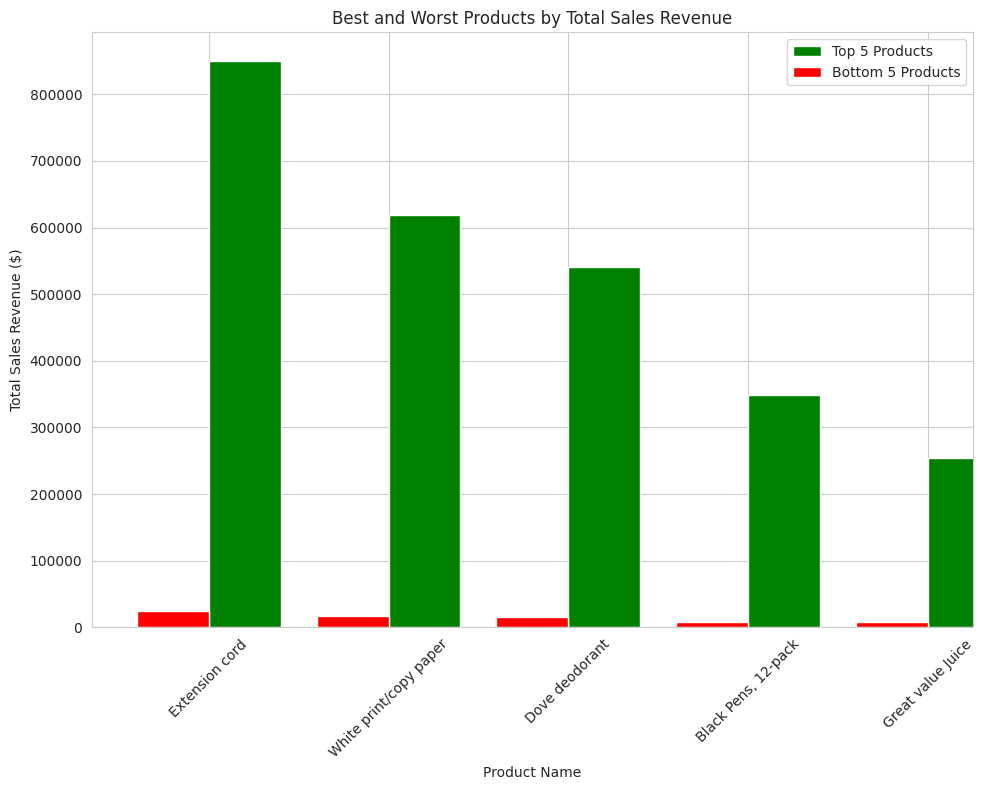

In [ ]:
#sales by product
product_sales = df_cleaned.groupby('product_name')['calculated_total_amount'].sum().sort_values(ascending=False)

# Plot the best and worst products by sales revenue
plt.figure(figsize=(10, 8))
product_sales.head(5).plot(kind='bar', position=0, color='green', width=0.4, label='Top 5 Products')
product_sales.tail(5).plot(kind='bar', position=1, color='red', width=0.4, label='Bottom 5 Products')
plt.title('Best and Worst Products by Total Sales Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Sales Revenue ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()